In [2]:
# Dependancies 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
from config import weather_api_key
from config import g_key
import requests
import time 
from datetime import datetime
from scipy.stats import linregress

In [2]:
lats = np.random.uniform(high = -90.000, low = 90.000, size = 1500)
lngt = np.random.uniform(high = -180.000, low = 180.000, size = 1500)

In [3]:
coordinates = zip(lats, lngt)

In [4]:
cities = []

In [5]:
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    if city not in cities:
        cities.append(city)
len(cities)

613

In [6]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
boston_data = city_weather.json()


In [7]:
boston_data["main"]["temp_max"]

39.94

In [8]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 39.94 36 20 5.99


In [9]:
# getting date from json data
date = boston_data["dt"]
# converting to standard time format
datetime.utcfromtimestamp(date)

datetime.datetime(2021, 11, 24, 23, 49, 20)

In [10]:
# more formatting on the date and time
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2021-11-24 23:49:20'

In [11]:
city_data = []
print("Beginning Data Retrieval")
print("--------------------------")
# creating counters
record_count = 1
set_count = 1

# loop through all cities in our lists

for i, city in enumerate(cities):
    if (i % 50 ==0 and i >= 50 ):
        set_count += 1
        record_count = 1
        time.sleep(60)
    # create an endpoint url for the cities
    city_url = url + "&q=" + city.replace(" ", "+")
    
    # logging record and set numbers and cities
    print(f"Processing Record {record_count} of {set_count} | {city}")
    # add 1 to record count
    record_count += 1
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval
--------------------------
Processing Record 1 of 1 | aitape
Processing Record 2 of 1 | geraldton
Processing Record 3 of 1 | hermanus
Processing Record 4 of 1 | ushuaia
Processing Record 5 of 1 | sungairaya
Processing Record 6 of 1 | acapulco
Processing Record 7 of 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 8 of 1 | pamanukan
Processing Record 9 of 1 | ponca city
Processing Record 10 of 1 | tabou
Processing Record 11 of 1 | tiksi
Processing Record 12 of 1 | prainha
Processing Record 13 of 1 | ndele
Processing Record 14 of 1 | halalo
City not found. Skipping...
Processing Record 15 of 1 | meulaboh
Processing Record 16 of 1 | atuona
Processing Record 17 of 1 | doha
Processing Record 18 of 1 | yagodnoye
Processing Record 19 of 1 | rikitea
Processing Record 20 of 1 | port alfred
Processing Record 21 of 1 | belushya guba
City not found. Skipping...
Processing Record 22 of 1 | puerto ayora
Processing Record 23 of 1 | busselton
Processing Recor

Processing Record 11 of 5 | tutoia
Processing Record 12 of 5 | soyo
Processing Record 13 of 5 | tandil
Processing Record 14 of 5 | saskylakh
Processing Record 15 of 5 | fukue
Processing Record 16 of 5 | sao joao da barra
Processing Record 17 of 5 | vostok
Processing Record 18 of 5 | naze
Processing Record 19 of 5 | torbay
Processing Record 20 of 5 | pacifica
Processing Record 21 of 5 | rio de jesus
Processing Record 22 of 5 | mahibadhoo
Processing Record 23 of 5 | hobart
Processing Record 24 of 5 | rongcheng
Processing Record 25 of 5 | bathsheba
Processing Record 26 of 5 | turan
Processing Record 27 of 5 | arraial do cabo
Processing Record 28 of 5 | colomi
Processing Record 29 of 5 | waingapu
Processing Record 30 of 5 | tadine
Processing Record 31 of 5 | alexandria
Processing Record 32 of 5 | careiro da varzea
Processing Record 33 of 5 | mabaruma
Processing Record 34 of 5 | empalme
Processing Record 35 of 5 | mosalsk
Processing Record 36 of 5 | pacific grove
Processing Record 37 of 5 |

Processing Record 20 of 9 | nizhneudinsk
Processing Record 21 of 9 | peleduy
Processing Record 22 of 9 | almeirim
Processing Record 23 of 9 | mandan
Processing Record 24 of 9 | matay
Processing Record 25 of 9 | quatre cocos
Processing Record 26 of 9 | rapid valley
Processing Record 27 of 9 | suntar
Processing Record 28 of 9 | sinazongwe
Processing Record 29 of 9 | katsuura
Processing Record 30 of 9 | platteville
Processing Record 31 of 9 | kanniyakumari
Processing Record 32 of 9 | mazagao
Processing Record 33 of 9 | nguiu
City not found. Skipping...
Processing Record 34 of 9 | moron
Processing Record 35 of 9 | kumluca
Processing Record 36 of 9 | karratha
Processing Record 37 of 9 | mantua
Processing Record 38 of 9 | oranjemund
Processing Record 39 of 9 | saldanha
Processing Record 40 of 9 | biak
Processing Record 41 of 9 | basco
Processing Record 42 of 9 | kavali
Processing Record 43 of 9 | san pedro
Processing Record 44 of 9 | paamiut
Processing Record 45 of 9 | igarka
Processing Reco

In [12]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Aitape,-3.1374,142.3475,85.01,65,96,3.22,PG,2021-11-24 23:49:27
1,Geraldton,-28.7667,114.6000,82.81,18,0,12.66,AU,2021-11-24 23:49:28
2,Hermanus,-34.4187,19.2345,58.80,72,0,19.69,ZA,2021-11-24 23:49:28
3,Ushuaia,-54.8000,-68.3000,47.86,61,40,23.02,AR,2021-11-24 23:46:32
4,Sungairaya,0.7000,108.9000,78.49,86,100,2.13,ID,2021-11-24 23:49:29
5,Acapulco,16.8634,-99.8901,79.75,80,8,5.55,MX,2021-11-24 23:48:17
6,Pamanukan,-6.2842,107.8106,81.43,77,93,3.18,ID,2021-11-24 23:49:29
7,Ponca City,36.7070,-97.0856,65.10,61,1,5.75,US,2021-11-24 23:49:30
8,Tabou,4.4230,-7.3528,79.81,84,30,5.86,CI,2021-11-24 23:49:30
9,Tiksi,71.6872,128.8694,-1.88,80,100,7.49,RU,2021-11-24 23:49:30


In [13]:
# reorder columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Aitape,PG,2021-11-24 23:49:27,-3.1374,142.3475,85.01,65,96,3.22
1,Geraldton,AU,2021-11-24 23:49:28,-28.7667,114.6000,82.81,18,0,12.66
2,Hermanus,ZA,2021-11-24 23:49:28,-34.4187,19.2345,58.80,72,0,19.69
3,Ushuaia,AR,2021-11-24 23:46:32,-54.8000,-68.3000,47.86,61,40,23.02
4,Sungairaya,ID,2021-11-24 23:49:29,0.7000,108.9000,78.49,86,100,2.13
5,Acapulco,MX,2021-11-24 23:48:17,16.8634,-99.8901,79.75,80,8,5.55
6,Pamanukan,ID,2021-11-24 23:49:29,-6.2842,107.8106,81.43,77,93,3.18
7,Ponca City,US,2021-11-24 23:49:30,36.7070,-97.0856,65.10,61,1,5.75
8,Tabou,CI,2021-11-24 23:49:30,4.4230,-7.3528,79.81,84,30,5.86
9,Tiksi,RU,2021-11-24 23:49:30,71.6872,128.8694,-1.88,80,100,7.49


In [14]:
# create output file
output_data_file = "weather_data/cities.csv"
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

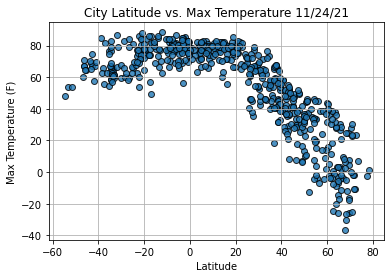

In [16]:
# scatter plot for latitude vs. max temperature
plt.scatter(lats, max_temps,edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("weather_data/Fig1.png")
plt.show()

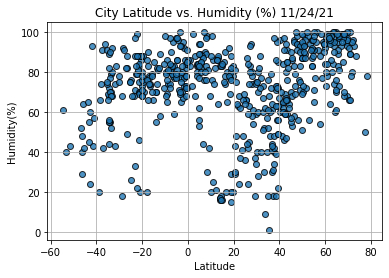

In [17]:
# scatter plot for latitude vs. humidity
plt.scatter(lats, humidity,edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")
plt.title(f"City Latitude vs. Humidity (%) "+ time.strftime("%x"))
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("weather_data/Fig2.png")
plt.show()

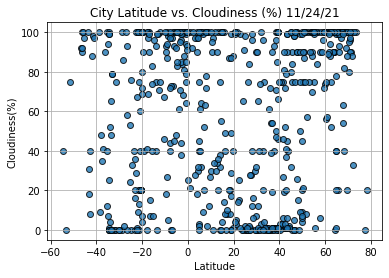

In [18]:
# scatter plot for latitude vs. Cloudiness
plt.scatter(lats, cloudiness,edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("weather_data/Fig3.png")
plt.show()

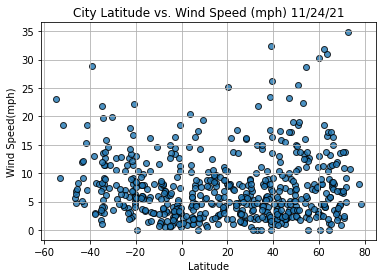

In [19]:
# scatter plot for latitude vs. max temperature
plt.scatter(lats, wind_speed,edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")
plt.title(f"City Latitude vs. Wind Speed (mph) "+ time.strftime("%x"))
plt.ylabel("Wind Speed(mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("weather_data/Fig4.png")
plt.show()

In [27]:
# creating a linear regression function
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # run regression on hemisphere weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [28]:
# accessing Norther Hemi data
city_data_df.loc[(city_data_df["Lat"] >= 0)]


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
4,Sungairaya,ID,2021-11-24 23:49:29,0.7000,108.9000,78.49,86,100,2.13
5,Acapulco,MX,2021-11-24 23:48:17,16.8634,-99.8901,79.75,80,8,5.55
7,Ponca City,US,2021-11-24 23:49:30,36.7070,-97.0856,65.10,61,1,5.75
8,Tabou,CI,2021-11-24 23:49:30,4.4230,-7.3528,79.81,84,30,5.86
9,Tiksi,RU,2021-11-24 23:49:30,71.6872,128.8694,-1.88,80,100,7.49
...,...,...,...,...,...,...,...,...,...
561,Gornyy,RU,2021-11-25 00:07:11,55.1153,83.9059,15.24,98,100,3.22
562,Cascais,PT,2021-11-25 00:07:11,38.6979,-9.4215,56.46,63,50,8.01
564,Rusera,IN,2021-11-25 00:07:12,25.7500,86.0333,62.08,44,1,1.52
565,Fort Nelson,CA,2021-11-25 00:07:12,58.8053,-122.7002,-4.41,77,90,2.30


In [29]:
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)] 

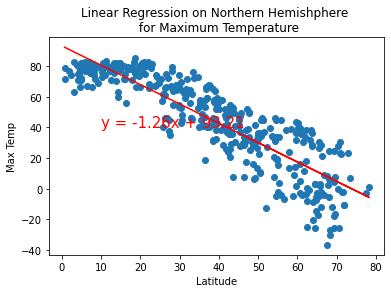

In [50]:
# northern hemi max temp linear regression
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Linear Regression on Northern Hemishphere \n for Maximum Temperature', 'Max Temp', (10,40))

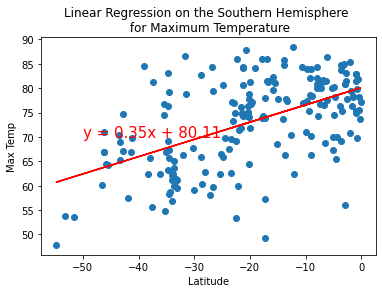

In [48]:
# northern hemi max temp linear regression
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,70))

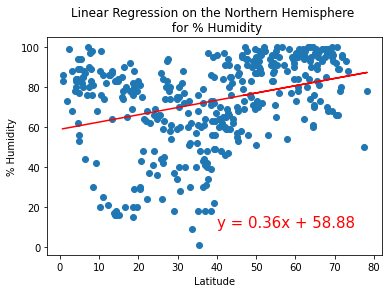

In [49]:
# northern hemi vs humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

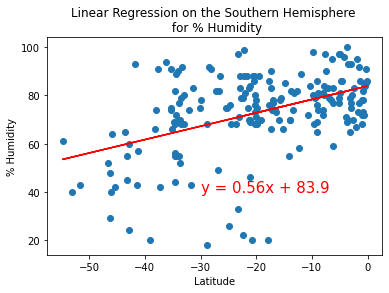

0.44969828619042285

In [57]:
# southern hemi vs humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-30,40))
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
r_value

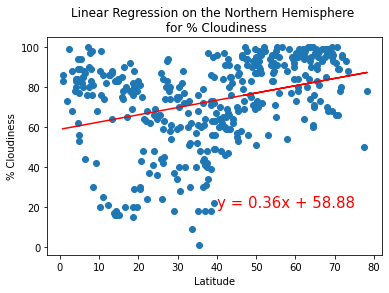

0.3300042660669414

In [62]:
# northern hemi vs humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(40,20))
# checking r value
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
r_value

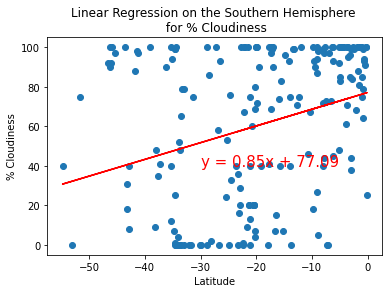

0.3058399645925377

In [61]:
# southern hemi vs CLoudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-30,40))
# checking r value
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
r_value


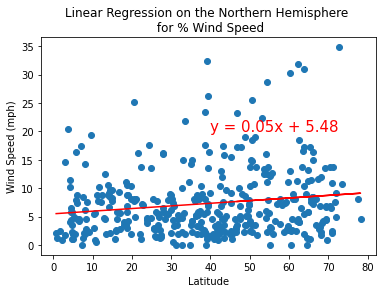

0.15671309258298355

In [64]:
# northern hemi vs Wind Speed
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Wind Speed', 'Wind Speed (mph)',(40,20))
# checking r value
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
r_value

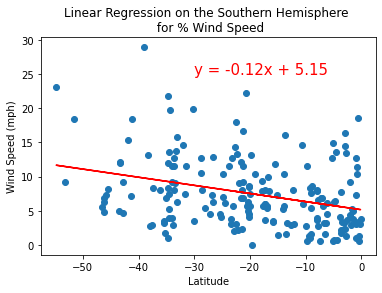

-0.32074437777641185

In [65]:
# southern hemi vs Wind Speed
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Wind Speed','Wind Speed (mph)' ,(-30,25))
# checking r value
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
r_value